In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_excel("netflix_titles.xlsx", sheet_name = 'netflix_titles')

In [2]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [4]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [5]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [6]:
df['release_year'].value_counts().sort_index()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

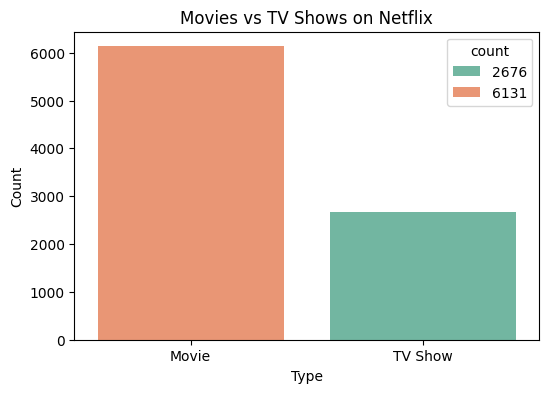

In [13]:
#1 Movies vs TV Shows
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2', hue=type_counts)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Movies vs TV Shows on Netflix')
plt.show()

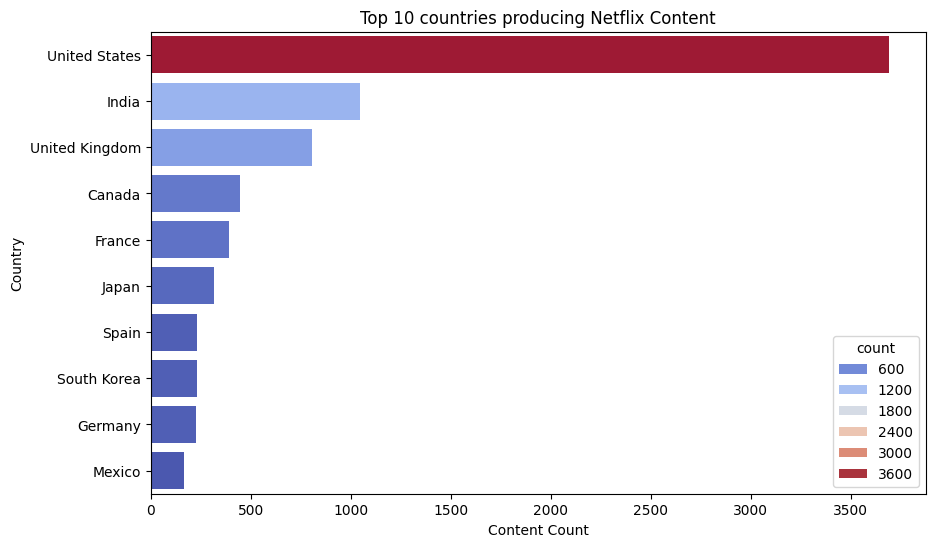

In [8]:
#2 Top 10 countries producing Netflix Content
df_countries = df.dropna(subset=['country'])
df_countries = df_countries.assign(country=df_countries['country'].str.split(','))
df_countries = df_countries.explode('country')
df_countries['country'] = df_countries['country'].str.strip()

# count and plot
top_countries = df_countries['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm', hue=top_countries)
plt.xlabel('Content Count')
plt.ylabel('Country')
plt.title('Top 10 countries producing Netflix Content')
plt.show()

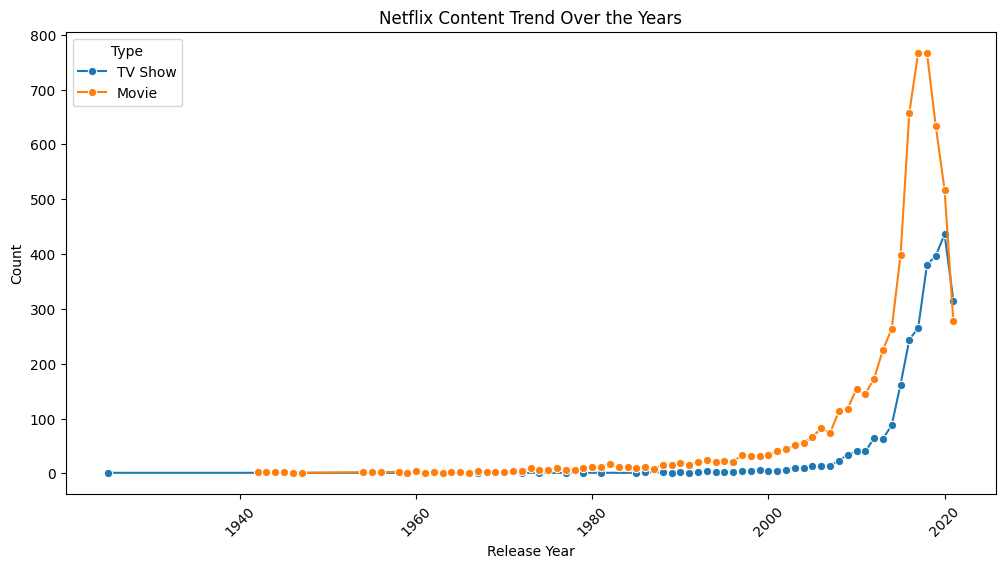

In [9]:
#3 Group by year and type
content_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Netflix Content Trend Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

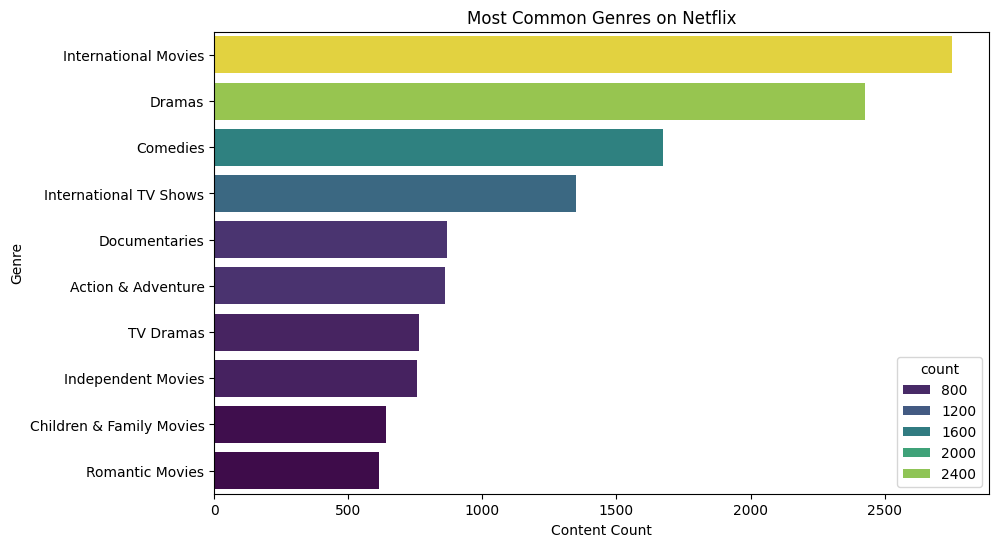

In [10]:
#4 Most Common Genres
df_genres = df.dropna(subset=['listed_in'])
df_genres = df_genres.assign(genre=df_genres['listed_in'].str.split(','))
df_genres = df_genres.explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()

# Count and plot
top_genres = df_genres['genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis', hue=top_genres)
plt.xlabel('Content Count')
plt.ylabel('Genre')
plt.title('Most Common Genres on Netflix')
plt.show()

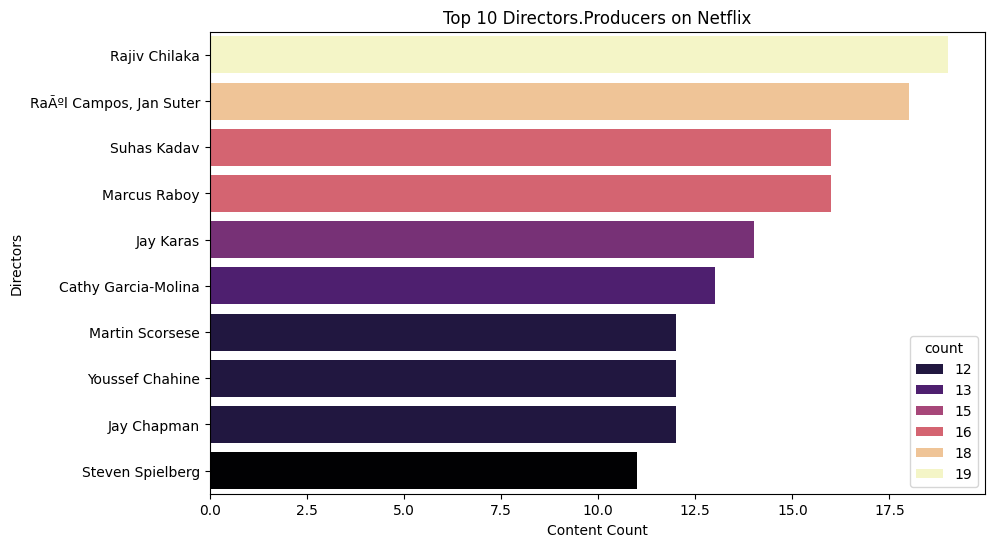

In [11]:
# Count directors (or producers)
df_directors = df.dropna(subset=['director'])
top_directors = df_directors['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='magma', hue=top_directors)
plt.xlabel('Content Count')
plt.ylabel('Directors')
plt.title('Top 10 Directors.Producers on Netflix')
plt.show()

In [3]:
df.head(10).to_string()

"  show_id     type                             title                        director                                                                                                                                                                                                                                                                                                             cast                                                                country          date_added  release_year rating   duration                                                      listed_in                                                                                                                                                    description\n0      s1    Movie              Dick Johnson Is Dead                 Kirsten Johnson                                                                                                                                                                                   